## **PROYECTO FINAL**
### REGRESIÓN

y = β0 + β1 ∗ x

donde

- y es la variable dependiente,
- x es la variable independiente,
- β0 es el intercepto de la recta,
- β1 es la pendiente de la recta.

In [1]:
from ClassProyecto import Proyecto
import pandas as pd
import os
import numpy as np

In [2]:
py = Proyecto()

## Cargo los datos del archivo

In [3]:
path_root = os.getcwd()
file_name = 'proyecto_training_data.npy'
full_path = f"{path_root}\\{file_name}"

data = np.load(full_path)

## Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).

In [4]:
# Forma del array
data.shape

(1460, 6)

In [5]:
# 1420
# 80% = 1420
# 20% = 292

x,y = data.shape
#print(x,y)

x = int(x*0.8)

data_train = data[0:x,:]
data_test = data[x:,:]

print('Train data: ', data_train.shape, "\n",'Test data:', data_test.shape)

Train data:  (1168, 6) 
 Test data: (292, 6)


### Creamos dataframe

In [6]:
cols_name = np.array(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

df_data = pd.DataFrame(data, columns=cols_name)
df_train = pd.DataFrame(data_train, columns=cols_name)
df_test = pd.DataFrame(data_test, columns=cols_name)

df_data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## 3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
- media
- valor maximo
- valor mınimo
- rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- desviacion estandar

In [7]:
df_info = df_data.describe().transpose()

df_info['ptp'] = df_info['max'] - df_info['min']

print("La información descriptiva del dataframe se muestra a continuación: ")
df_info.head()

La información descriptiva del dataframe se muestra a continuación: 


,count,mean,std,min,25%,50%,75%,max,ptp
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.0,163000.0,214000.00,755000.0,720100.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.00,10.0,9.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0,4358.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.00,14.0,12.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0,138.0


## 4. Para cada variable en el dataset usar seaborn(funcion distplot) para graficar un histograma de la variable.

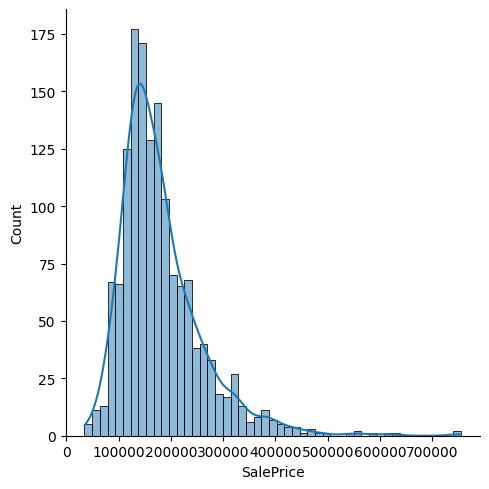

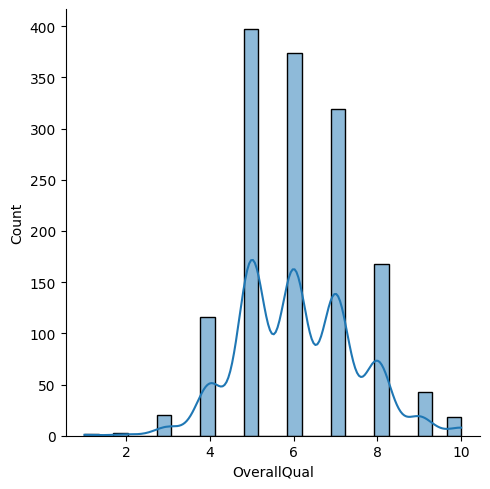

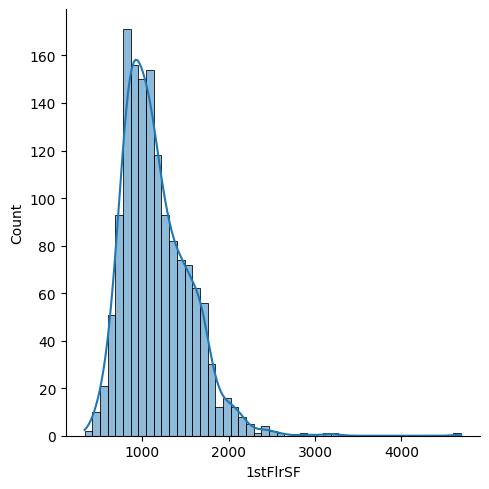

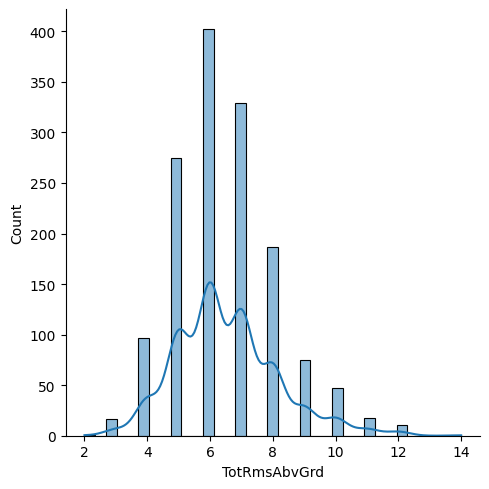

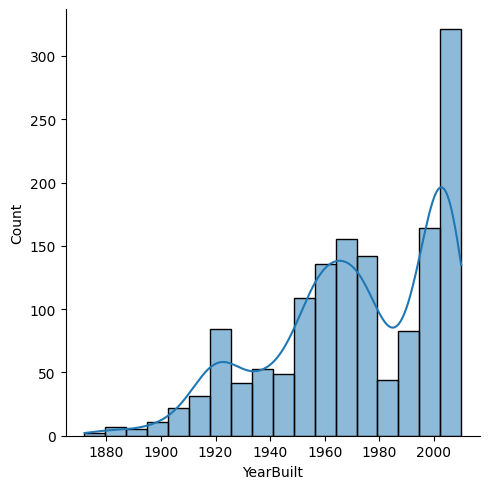

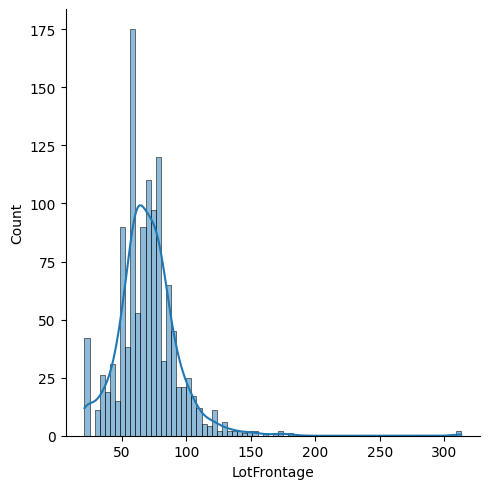

In [8]:
py.mostrarGraficasColumnas(df_data)

## 5. Para cada variable independiente x :
- Calcular el coeficiente de correlaci´on entre x y y.
- Graficar x vs y(scatterplot) usando matplotlib.
- Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
- Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on entre dicha variable y la variable dependiente.

## OBTENER COEFICIENTE DE CORRELACION

In [9]:
print('Mostrando coeficiente de correlación: ')

df_corr = df_data.corr().iloc[0]
df_corr

Mostrando coeficiente de correlación: 


SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
LotFrontage     0.351799
Name: SalePrice, dtype: float64

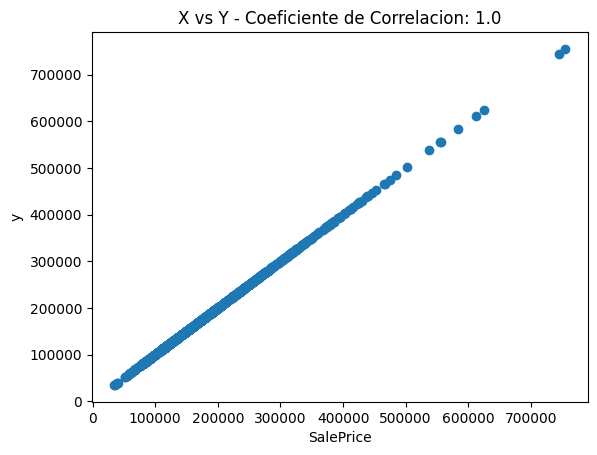

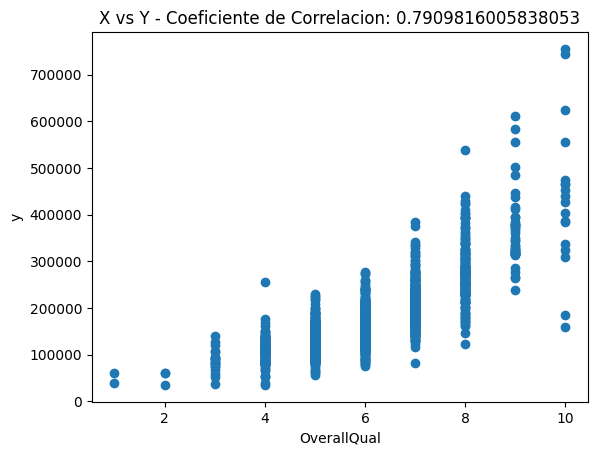

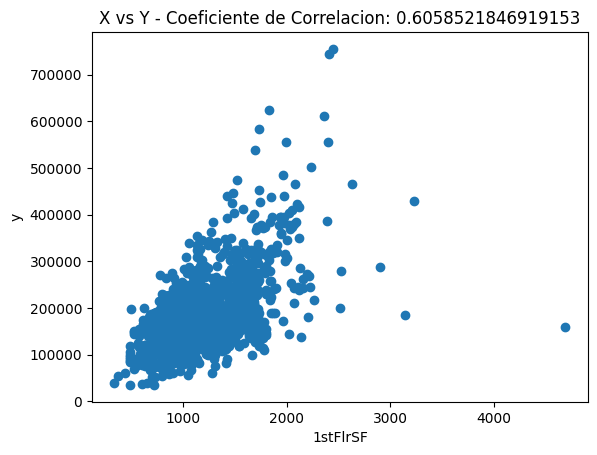

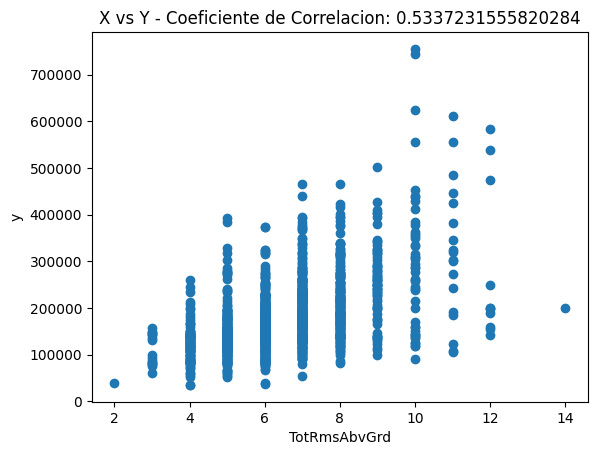

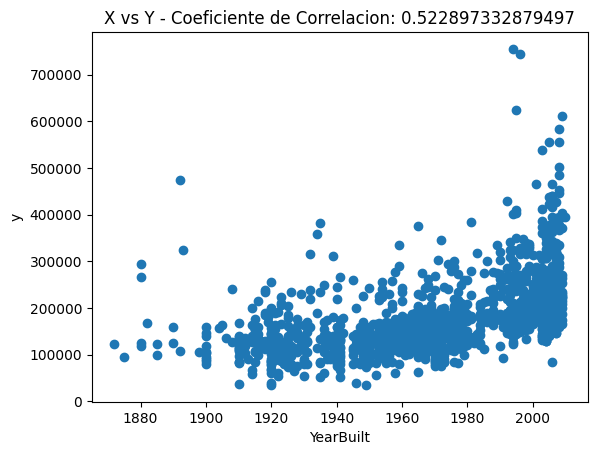

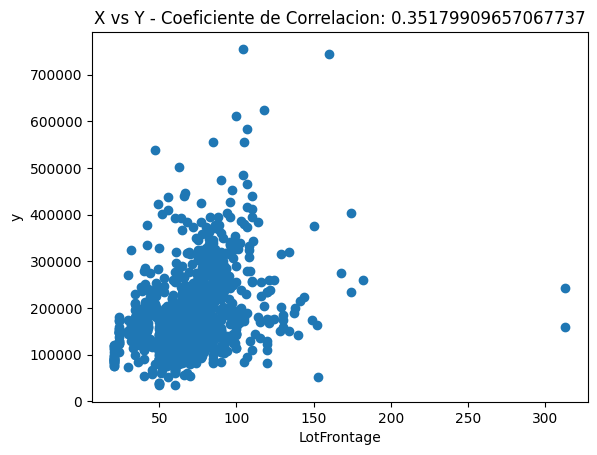

In [10]:
py.mostrarGraficasCorrelacion(df_data)

## Tomar 2 variables con mayor correlacion

### Variables seleccionadas:
### OverallQual: 0.790982
### 1stFlrSF: 0.605852

In [11]:
var_predictivo1 = 'OverallQual'
var_predictivo2 = '1stFlrSF'

Resultados variable:  OverallQual
Epoch 0: error = 38819444106.4435


c:\Users\LAPTOP-ERICK\Documents\Maestria Data Scientist\2023\Trimestre 1\Ciencia de datos con Python\proyecto_final_regresion\ClassProyecto.py:63: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  gradiente = np.mean((y_pred - y)[:, np.newaxis] * X, axis=0)


Epoch 5000: error = 2602570573.8357744
Epoch 10000: error = 2486123213.4032416
Epoch 15000: error = 2413596529.485971
Epoch 20000: error = 2368424875.4399056


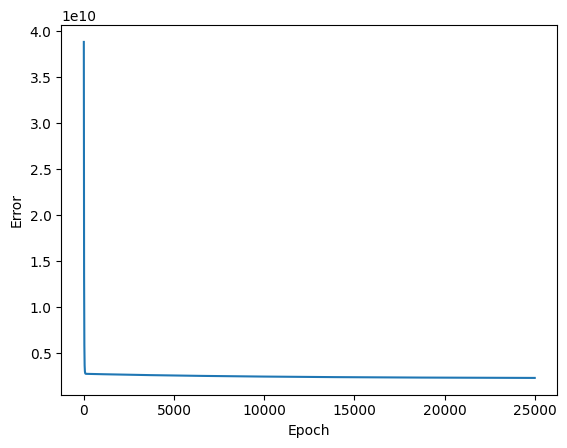

Resultados variable:  1stFlrSF
Epoch 0: error = 38819444106.4435
Epoch 4: error = 4029171236.7169375
Epoch 8: error = 3936433903.742233
Epoch 12: error = 3936186636.7007127
Epoch 16: error = 3936185912.019212


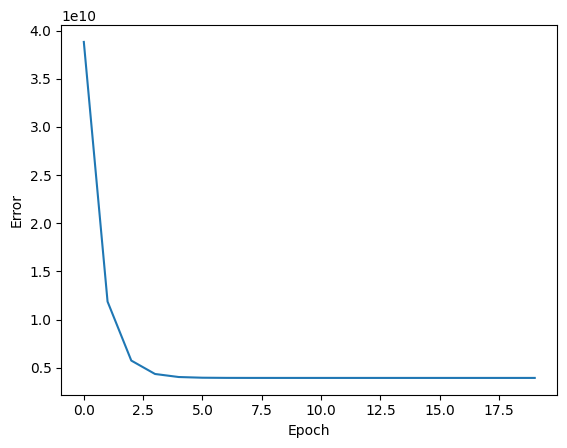

In [12]:
print("Resultados variable: ", var_predictivo1)
resultado1 = py.trainLinearRegression(df_train[var_predictivo1], df_train['SalePrice'], epochs=25000, print_error_each=5000, alpha=0.001)
py.graficasErrores(resultado1[0])

print("Resultados variable: ", var_predictivo2)
resultado2 = py.trainLinearRegression(df_train[var_predictivo2], df_train['SalePrice'], epochs=20, print_error_each=4, alpha=0.000001)
py.graficasErrores(resultado2[0])

### Funcion para graficar la evolución del modelo


Evolución de modelo del primer valor predictivo



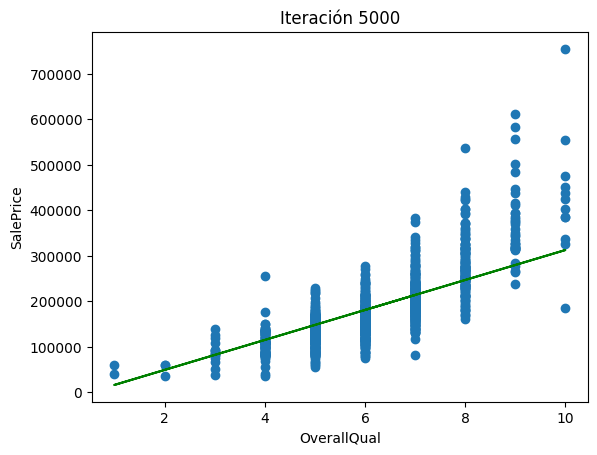

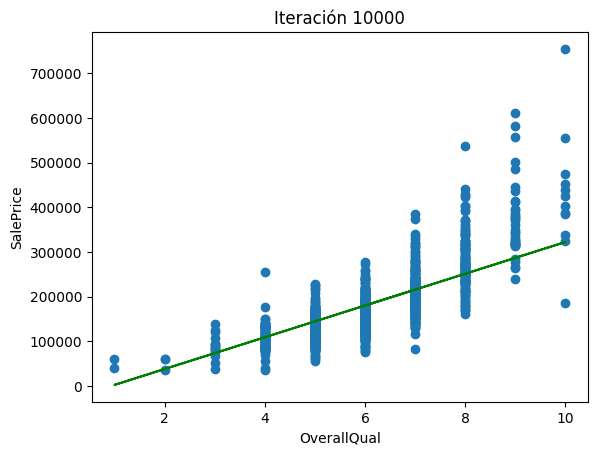

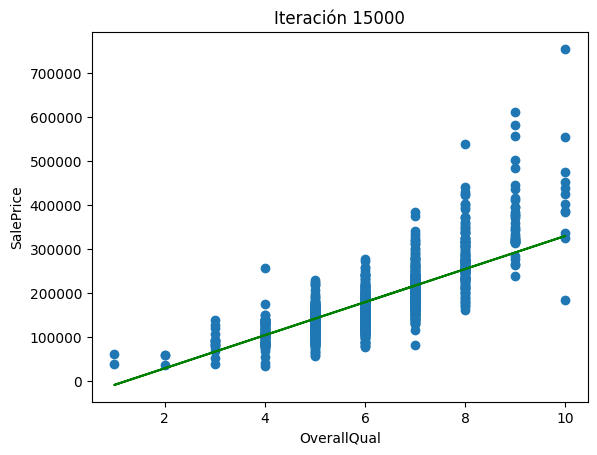

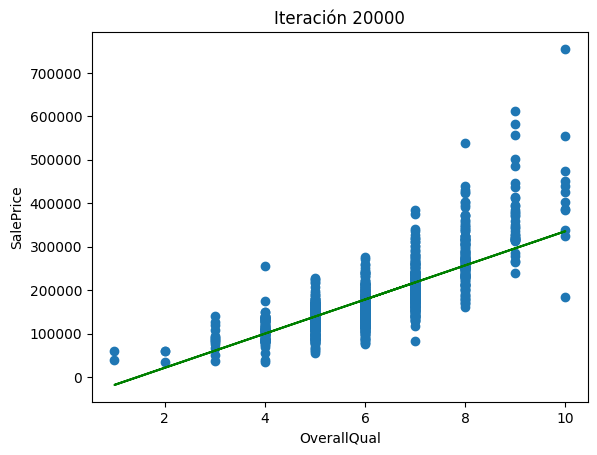


Evolución de modelo del segundo valor predictivo



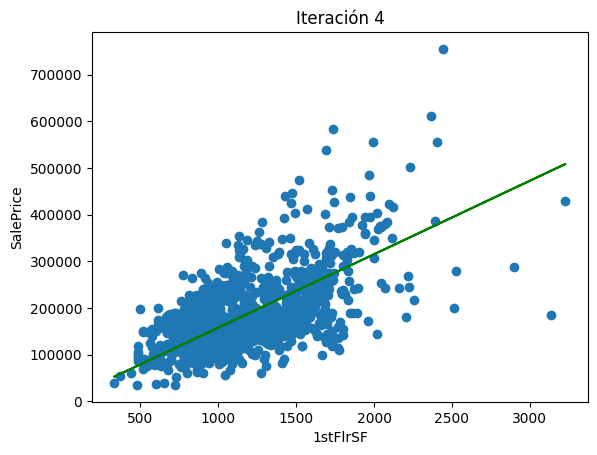

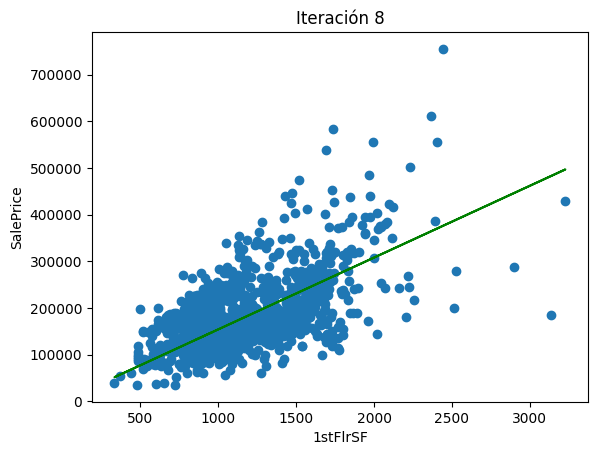

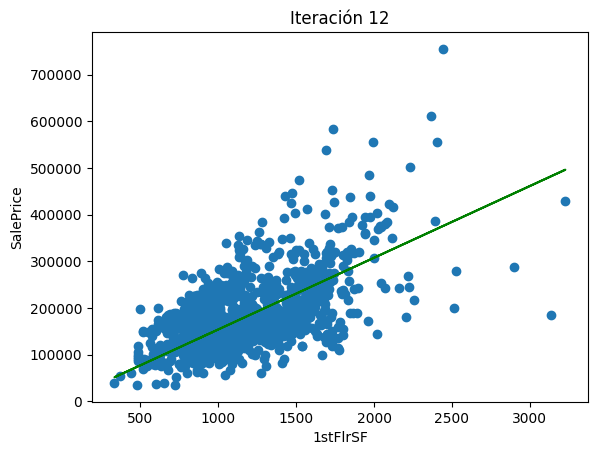

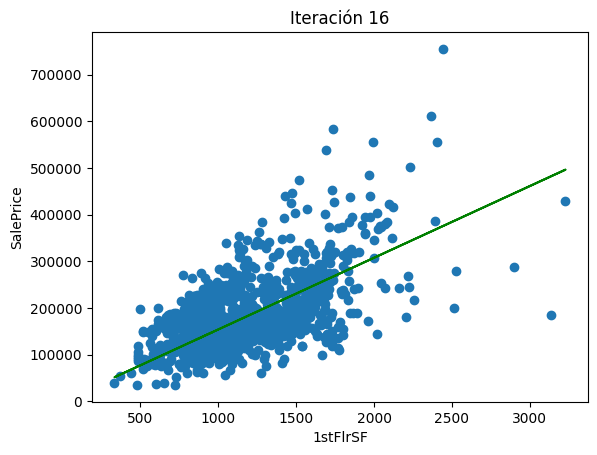

In [13]:
print("\nEvolución de modelo del primer valor predictivo\n")
py.graficarModelo(5000, resultado1[1], var_predictivo1, df_train)

print("\nEvolución de modelo del segundo valor predictivo\n")
py.graficarModelo(4, resultado2[1], var_predictivo2, df_train)

### Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresi´on lineal: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [14]:
print("Regresión lineal con scikit-learn\n")

print("Primer variable con más valor predictivo")
skl_fit_var1 = py.scikitlearnFitModel(df_train, var_predictivo1)

print("\nSegunda variable con más valor predictivo")
skl_fit_var2 = py.scikitlearnFitModel(df_train, var_predictivo2)

Regresión lineal con scikit-learn

Primer variable con más valor predictivo
score: 0.6304202002336672
coef: [45411.99877916]
intercept: -96469.57131873982

Segunda variable con más valor predictivo
score: 0.37981176187078936
coef: [129.95124229]
intercept: 30324.585174963664


### Para cada variable independiente x elegida, crear una funci´on que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como par´ametros a la funci´on)

In [15]:
def obtener_modelo_manual(resultados):
    index = len(resultados)-1
    return resultados[index]['beta']

def predecir_modelo(x, beta):
    matriz_auxiliar = np.hstack((x, np.ones(x.shape) ))
    r = np.matmul(matriz_auxiliar, beta)
    return r

def calcular_estimacion(skl_modelo, modelo_manual, x):
    scikitlearn_predict = skl_modelo.predict(x)
    modelo_manual_predict = predecir_modelo(x, modelo_manual)
    promedio = np.nanmean(np.array([scikitlearn_predict, modelo_manual_predict]), axis=0)
    return (scikitlearn_predict, modelo_manual_predict, promedio)

x_var1 = df_test[var_predictivo1].values.reshape(-1, 1)
x_var2 = df_test[var_predictivo2].values.reshape(-1, 1)

est_var1 = py.calcularEstimacion(skl_fit_var1, py.obtenerModeloManual(resultado1[1]), x_var1) 
est_var2 = py.calcularEstimacion(skl_fit_var2,  py.obtenerModeloManual(resultado1[1]), x_var2)

### Usando el 20 % de los datos de validaci´on, aplicamos los modelos predictivos para estimar la variable dependiente y usando los valores reales de y calculamos el error de cada modelo. Para cada variable independiente x elegida

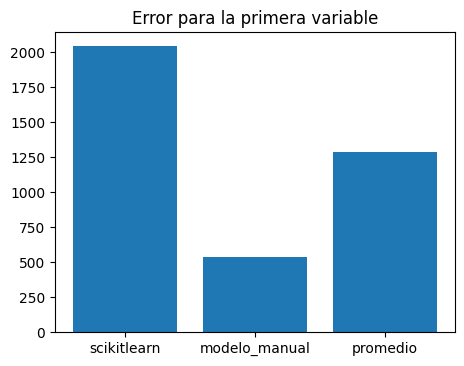

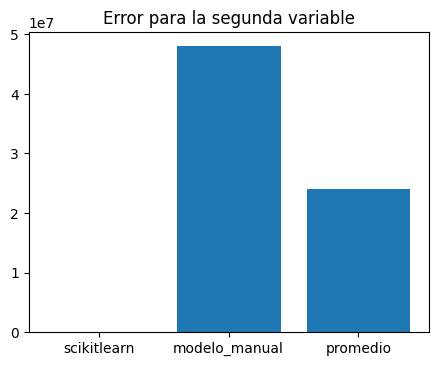

In [16]:
precio_real = df_test['SalePrice'].values.reshape(-1, 1)

error_var1_skl = precio_real - est_var1[0]
error_var1_modelomanual = precio_real - est_var1[1]
error_var1_promedio = precio_real - est_var1[2]

py.graficaBarrasComparacion(error_var1_skl, error_var1_modelomanual, error_var1_promedio, "Error para la primera variable")

error_var2_skl = np.sqrt((precio_real - est_var2[0])**2)
error_var2_modelomanual = np.sqrt((precio_real - est_var2[1])**2)
error_var2_promedio = np.sqrt((precio_real - est_var2[2])**2)
py.graficaBarrasComparacion(error_var2_skl, error_var2_modelomanual, error_var2_promedio, "Error para la segunda variable")